# **Importing the necessary packages and modules**

In [1]:
import numpy as np
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


# **The network architecture**

In [2]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

## **Loading the MNIST dataset in Keras**

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# **Let’s look at the data:**

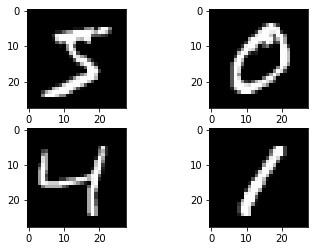

In [5]:

# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = (train_images, train_labels), (test_images, test_labels)
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()


Let's look at the training data

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

# **the test data:**

In [8]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

In [11]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [12]:
test_labels.shape

(10000,)

## **To make the network ready for training, we need to pick three more things, as part of the compilation step:**
1.   A loss function—How the network will be able to measure its performance on the training data, and thus how it will be able to steer itself in the right direction.
2.   An optimizer—The mechanism through which the network will update itself
based on the data it sees and its loss function.
3.   Metrics to monitor during training and testing—Here, we’ll only care about accuracy (the fraction of the images that were correctly classified).

In [13]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# **Preparing the image data**
Before training, we’ll preprocess the data by reshaping it into the shape the network expects and scaling it so that all values are in the [0, 1] interval. Previously, our training images, for instance, were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

visualize MNIST Dataset

# **We also need to categorically encode the labels**

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [16]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

array([[0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

# **We’re now ready to train the network, which in Keras is done via a call to the network’s fit method—we fit the model to its training data:**

In [17]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/5





60000/60000 [==============================] - 5s 88us/step - loss: 0.2626 - acc: 0.9237
Epoch 2/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.1076 - acc: 0.9674
Epoch 3/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0698 - acc: 0.9789
Epoch 4/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0518 - acc: 0.9845
Epoch 5/5
60000/60000 [==============================] - 5s 78us/step - loss: 0.0384 - acc: 0.9884


***Two quantities are displayed during training: the loss of the network over the training data, and the accuracy of the network over the training data. We quickly reach an accuracy of 0.989 (98.9%) on the training data.We quickly reach an accuracy of 0.989 (98.9%) on the training data.***

# **Now let’s check that the model performs well on the test set, too:**

In [18]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 55us/step
test_acc: 0.9814


An Arbitary image

In [19]:
from keras.preprocessing import image
test_image = []

img = image.load_img('/content/img_11.jpg', target_size=(28,28,1), grayscale=True)
img = image.img_to_array(img)
img = img/255
test_image=img
test_image = test_image.reshape(1,28*28)
test_image = np.array(test_image)

test_label = train_labels[:1]
print(test_label)

test_loss, test_acc = network.evaluate(test_image,test_label)
print('test_acc:', test_acc)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


FileNotFoundError: ignored